### Check input files



In [ ]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('../datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### Import train data and create DataFrame object

In [ ]:
numeric_data = pd.read_csv('../datasets/firstDataset.csv')
print("The files have been imported")


In [ ]:

def makeOnlyAttackOrNot(dataToTransform):
    columnToTransform = ['Label']
    for colKey in columnToTransform:
        dataToTransform[colKey] = dataToTransform[colKey].map(
            lambda i: 0 if i == 'Benign' else 1)
        # dataToTransform[colKey] = LabelEncoder().fit_transform(dataToTransform[colKey])

    return dataToTransform


In [ ]:
numeric_data = makeOnlyAttackOrNot(numeric_data)

In [ ]:
numeric_data = numeric_data.drop(['Timestamp'], axis=1)

In [20]:
import numpy as np

numeric_data = numeric_data.replace(np.nan, 0)
numeric_data = numeric_data.replace(np.inf, 0)

In [21]:
labels = numeric_data['Label']

In [22]:
numeric_data = numeric_data.drop_duplicates()

In [23]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674808 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           674808 non-null  int64  
 1   Protocol           674808 non-null  int64  
 2   Flow Duration      674808 non-null  int64  
 3   Tot Fwd Pkts       674808 non-null  int64  
 4   Tot Bwd Pkts       674808 non-null  int64  
 5   TotLen Fwd Pkts    674808 non-null  int64  
 6   TotLen Bwd Pkts    674808 non-null  int64  
 7   Fwd Pkt Len Max    674808 non-null  int64  
 8   Fwd Pkt Len Min    674808 non-null  int64  
 9   Fwd Pkt Len Mean   674808 non-null  float64
 10  Fwd Pkt Len Std    674808 non-null  float64
 11  Bwd Pkt Len Max    674808 non-null  int64  
 12  Bwd Pkt Len Min    674808 non-null  int64  
 13  Bwd Pkt Len Mean   674808 non-null  float64
 14  Bwd Pkt Len Std    674808 non-null  float64
 15  Flow Byts/s        674808 non-null  float64
 16  F

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def showHeatMap(data):
    f, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(abs(data.corr()), annot=True,
                linewidths=0.5, fmt='.2f', ax=ax)


In [25]:
columns1_10 = numeric_data[numeric_data.columns[1:11]]
columns1_10['Label'] = labels

columns10_20 = numeric_data[numeric_data.columns[11:21]]
columns10_20['Label'] = labels

columns20_30 = numeric_data[numeric_data.columns[21:31]]
columns20_30['Label'] = labels

columns30_40 = numeric_data[numeric_data.columns[31:41]]
columns30_40['Label'] = labels

columns40_50 = numeric_data[numeric_data.columns[41:51]]
columns40_50['Label'] = labels

columns50_60 = numeric_data[numeric_data.columns[51:61]]
columns50_60['Label'] = labels

columns60_70 = numeric_data[numeric_data.columns[61:71]]
columns60_70['Label'] = labels

columns70_80 = numeric_data[numeric_data.columns[71:81]]
columns70_80['Label'] = labels

/tmp/ipykernel_8422/2822149610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns1_10['Label'] = labels
/tmp/ipykernel_8422/2822149610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns10_20['Label'] = labels
/tmp/ipykernel_8422/2822149610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

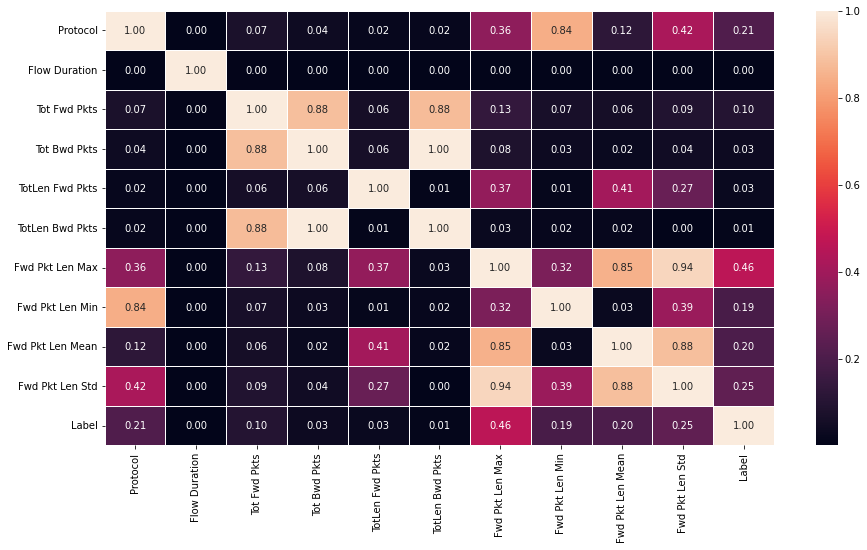

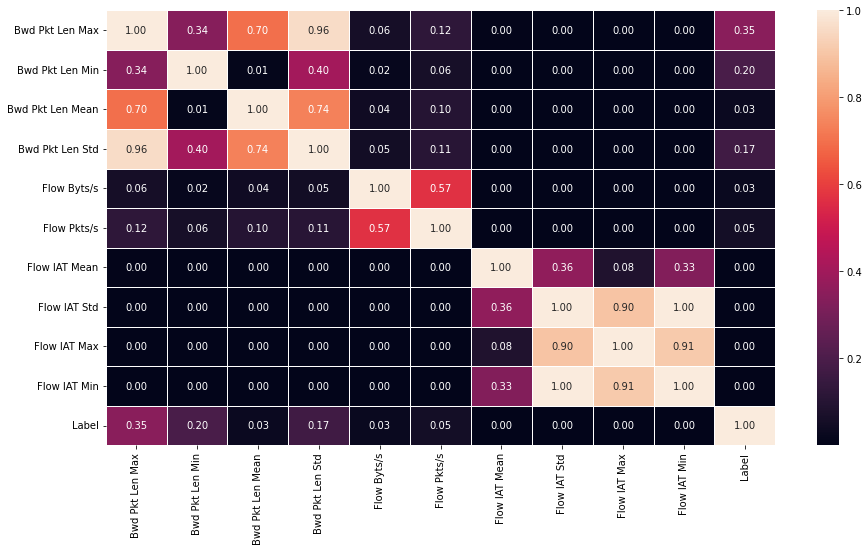

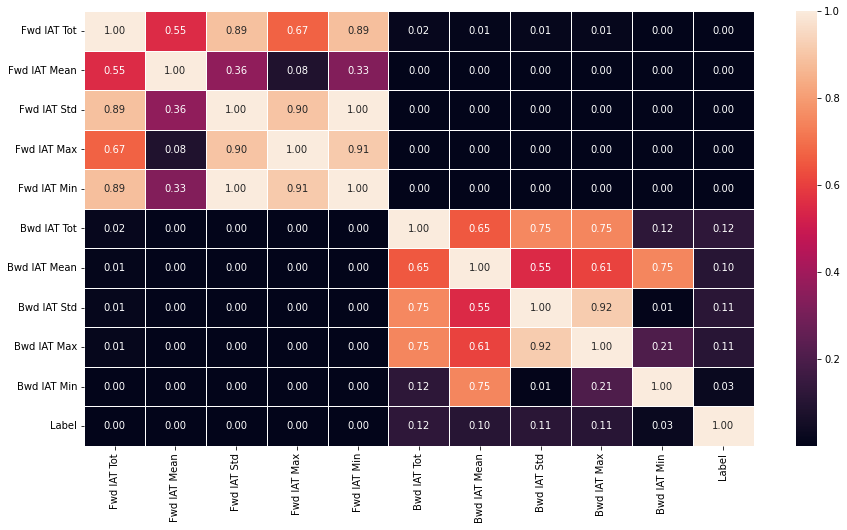

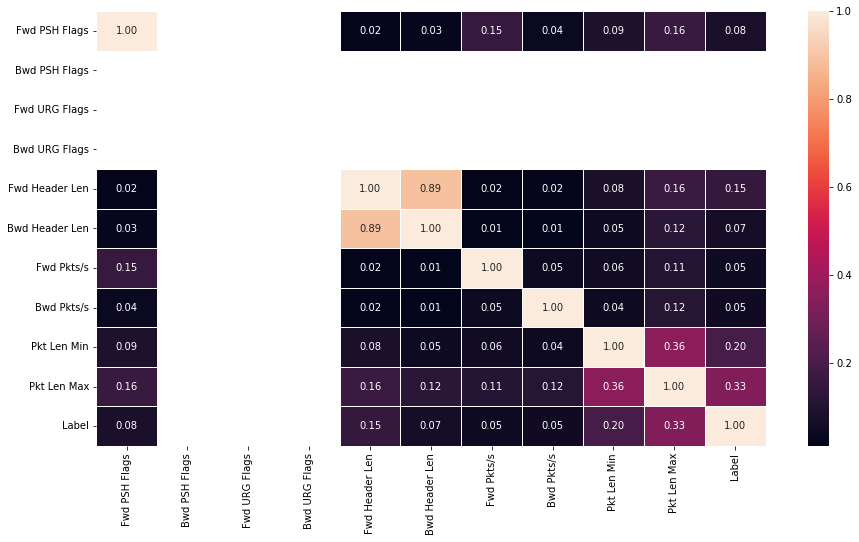

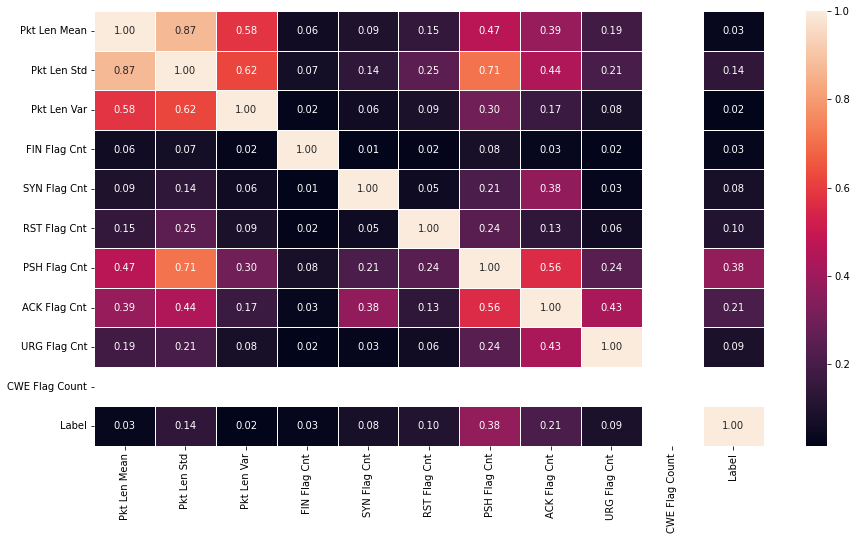

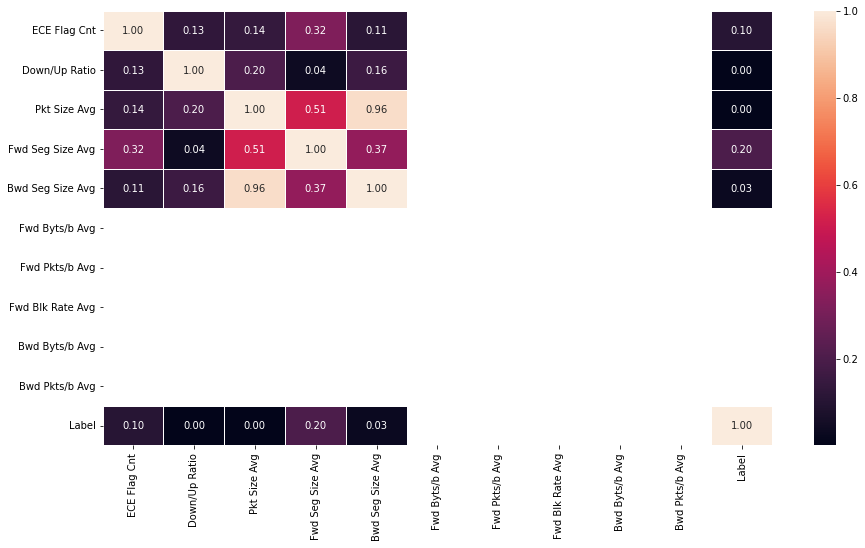

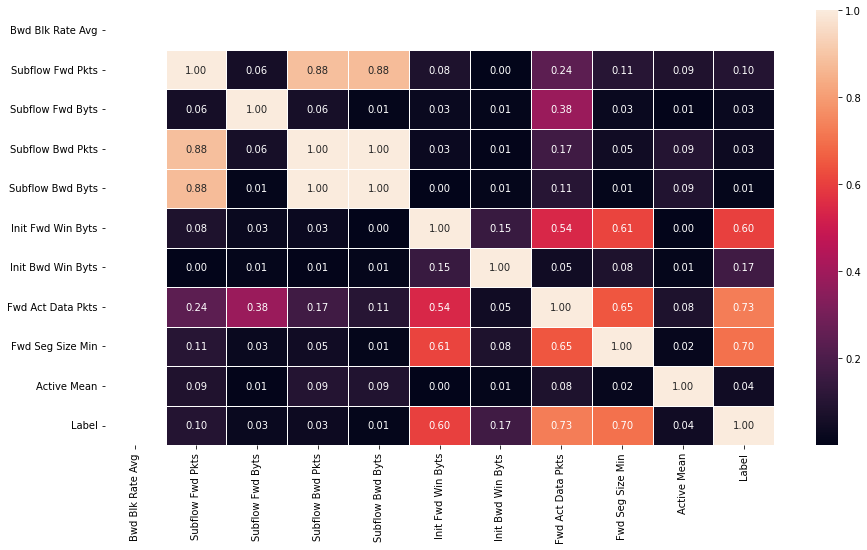

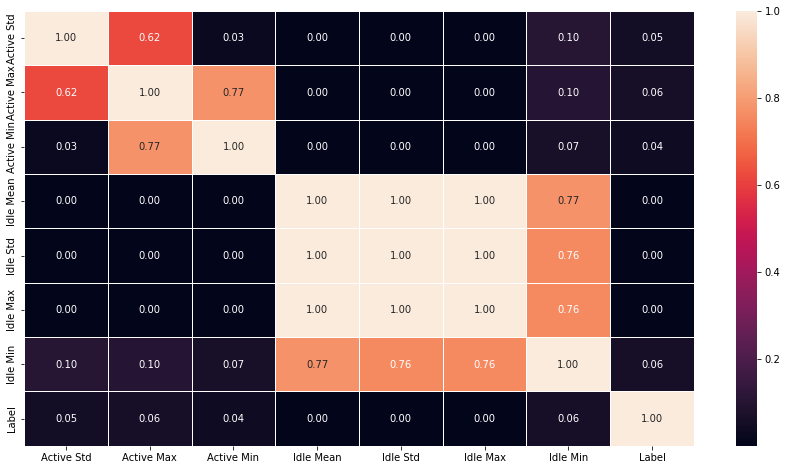

In [26]:
showHeatMap(columns1_10)
showHeatMap(columns10_20)
showHeatMap(columns20_30)
showHeatMap(columns30_40)
showHeatMap(columns40_50)
showHeatMap(columns50_60)
showHeatMap(columns60_70)
showHeatMap(columns70_80)